In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline 

In [15]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

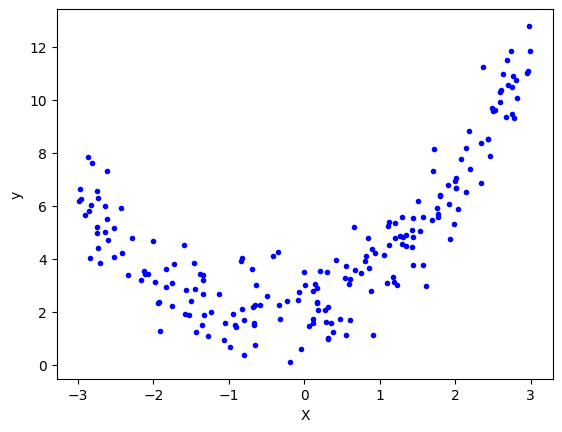

In [16]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)
                                               

In [18]:
X_train.shape

(160, 1)

In [20]:
#apply linearRegression
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred=lr.predict(X_test)

In [27]:
r2_score(y_test,y_pred)

0.3446587002183942

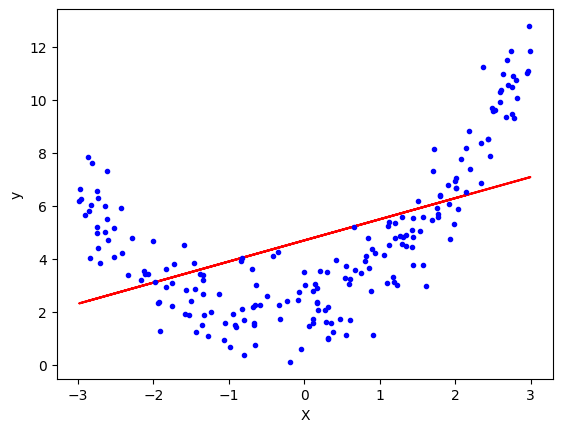

In [28]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### using polynomial linear regression


In [32]:
#degree=2
# we have to transform it inot polynomial before training the model
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [33]:
lr=LinearRegression()


In [35]:
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_pred=lr.predict(X_test_trans)

In [37]:
r2_score(y_test,y_pred)

0.882049430039004

In [38]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87732846 0.78374134]]
[2.10105397]


In [39]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

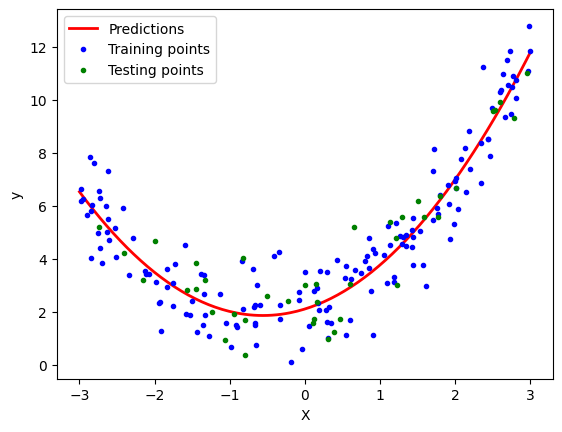

In [40]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### apply gradient descent 


In [41]:
poly=PolynomialFeatures(degree=2)

In [42]:
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [45]:
sgd=SGDRegressor(max_iter=100)

In [48]:
sgd.fit(X_train_trans,y_train)


D:\new folder\envs\py312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [49]:

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)



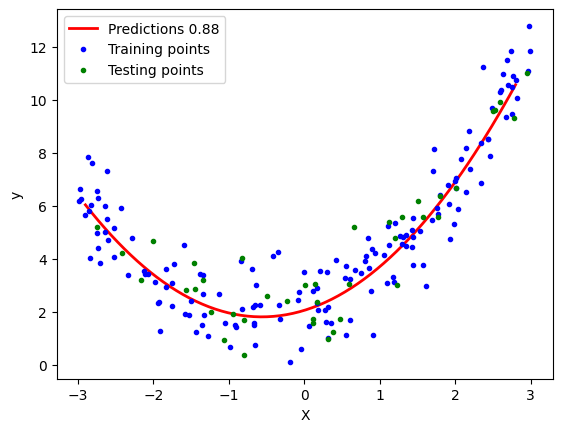

In [50]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### 3D polynomial regression


In [52]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

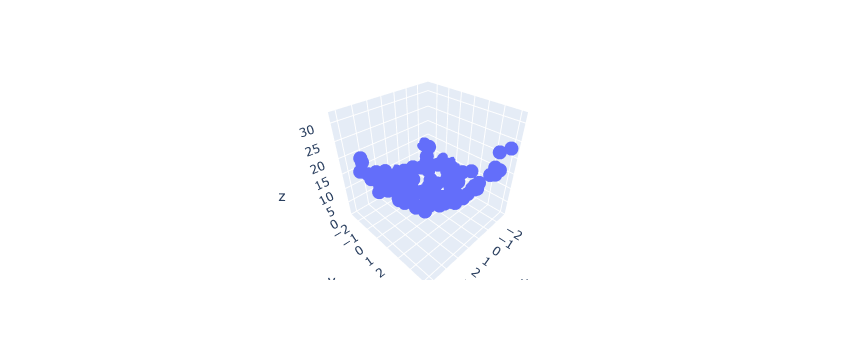

In [53]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [54]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

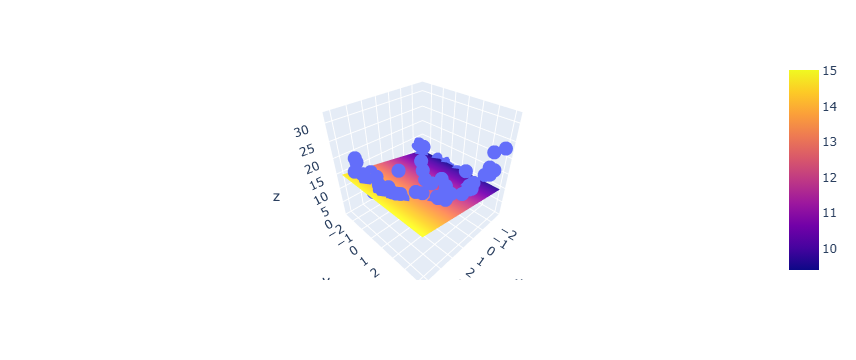

In [55]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [56]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [59]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [61]:
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)


Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [11  3]
 

In [62]:
X_multi_trans.shape

(100, 496)

In [63]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
X_test_multi = poly.transform(final)

In [65]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

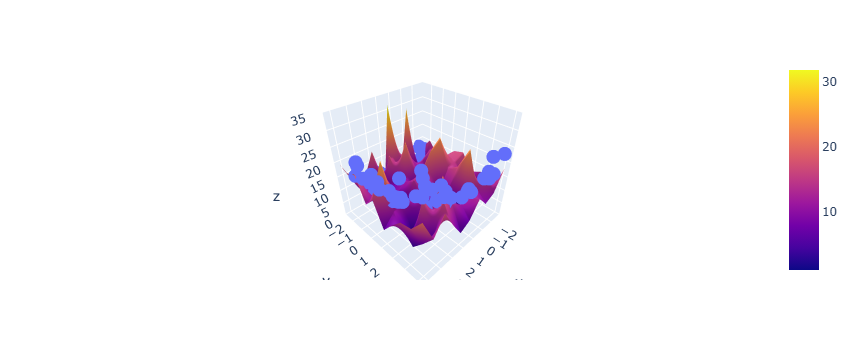

In [66]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()
